<a href="https://colab.research.google.com/github/1sarthakbhardwaj/Gen-AI/blob/main/chatbot_using_langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph langsmith


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 801.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.1/149.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.9/394.9 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [2]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.5 MB/s eta 0:00:00


In [3]:
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')

In [ ]:
langsmith=userdata.get('langsmith_api_key')


In [7]:
import os
os.environ["LANGCHAIN_PAI_KEY"]=langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]= "CourseLanggraph"

In [8]:
from langchain_groq import ChatGroq

In [41]:
llm = ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7ed78a695bd0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7ed78a5042e0>, model_name='Gemma2-9b-It', groq_api_key=SecretStr('**********'))

## starting out with the *chatbot*

In [31]:
  from typing import Annotated
  from typing_extensions import TypedDict
  from langgraph.graph import StateGraph,START,END
  from langgraph.graph.message import add_messages

In [32]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [33]:
graph_builder

In [34]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [35]:
graph_builder.add_node("chatbot",chatbot)

In [36]:
graph_builder

In [37]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot", END)

In [38]:
graph=graph_builder.compile()

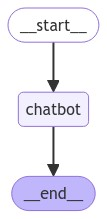

In [39]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:", value["messages"].content)

User: hi


LangSmithUserError('API key must be provided when using hosted LangSmith API')
LangSmithUserError('API key must be provided when using hosted LangSmith API')
LangSmithUserError('API key must be provided when using hosted LangSmith API')
LangSmithUserError('API key must be provided when using hosted LangSmith API')
LangSmithUserError('API key must be provided when using hosted LangSmith API')


dict_values([{'messages': AIMessage(content='Hello! 👋 \n\nHow can I help you today? 😊\n', response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 10, 'total_tokens': 26, 'completion_time': 0.029090909, 'prompt_time': 3.8e-07, 'queue_time': 0.014331198, 'total_time': 0.029091289}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-f76e6ff0-873d-4883-b4f0-008997ecceac-0', usage_metadata={'input_tokens': 10, 'output_tokens': 16, 'total_tokens': 26})}])
content='Hello! 👋 \n\nHow can I help you today? 😊\n' response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 10, 'total_tokens': 26, 'completion_time': 0.029090909, 'prompt_time': 3.8e-07, 'queue_time': 0.014331198, 'total_time': 0.029091289}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-f76e6ff0-873d-4883-b4f0-008997ecceac-0' usage_metadata={'input_tokens'

LangSmithUserError('API key must be provided when using hosted LangSmith API')
LangSmithUserError('API key must be provided when using hosted LangSmith API')
LangSmithUserError('API key must be provided when using hosted LangSmith API')
LangSmithUserError('API key must be provided when using hosted LangSmith API')
LangSmithUserError('API key must be provided when using hosted LangSmith API')


dict_values([{'messages': AIMessage(content='"Gen AI" is short for **Generative Artificial Intelligence**. \n\nHere\'s a breakdown:\n\n* **Artificial Intelligence (AI):**  Refers to computer systems that can perform tasks that typically require human intelligence, such as learning, problem-solving, and decision-making.\n* **Generative:** This means the AI system can create new content. It doesn\'t just analyze existing data; it generates something original.\n\n**What can Gen AI do?**\n\nGen AI models are trained on massive datasets of text, images, code, audio, or other types of data. This training allows them to learn patterns and structures within the data.  \n\nHere are some examples of what Gen AI can generate:\n\n* **Text:**  Articles, stories, poems, dialogue, code, emails, letters\n* **Images:** Photos, artwork, illustrations, designs\n* **Audio:** Music, sound effects, voiceovers\n* **Video:** Short clips, animations\n* **Code:**  Software programs, scripts\n\n**Popular Gen AI 